## Reading the data

In [1]:
import pandas as pd
import numpy as np
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


df = pd.read_csv("../../corpus_sprint3_balanced_cleaned_all.csv", encoding="utf-8")
df = df.dropna()
print(df)
print(df.shape)

model = Doc2Vec.load("../../model_doc2vec_balanced_20epochs")

                                                Product  \
0             Payday loan, title loan, or personal loan   
1             Payday loan, title loan, or personal loan   
2                                 Vehicle loan or lease   
3     Money transfer, virtual currency, or money ser...   
4             Payday loan, title loan, or personal loan   
...                                                 ...   
9405                        Checking or savings account   
9406                            Bank account or service   
9407                            Bank account or service   
9408                            Bank account or service   
9409                            Bank account or service   

                     Sub-product  \
0               Installment loan   
1               Installment loan   
2                           Loan   
3                Debt settlement   
4                    Payday loan   
...                          ...   
9405            Checking account   
940

## One hot encoding and concatenating

In [2]:
vectors = model.docvecs.vectors_docs

In [3]:

one_hot = pd.Categorical(df['Sub-product'])
df_dummies = pd.get_dummies(one_hot)

one_hot2 = pd.Categorical(df['Product'])
df_dummies2 = pd.get_dummies(one_hot)

v_df = pd.DataFrame(vectors)
df_concat = pd.concat([v_df, df_dummies, df_dummies2], axis = 1)
print(df_concat.shape)

(9410, 158)


## Applying T-SNE

In [4]:
tsne = TSNE(n_components=2)
data_reduced = tsne.fit_transform(df_concat)


In [5]:
print(data_reduced.shape)

(9410, 2)


## Applying k-means

In [6]:
from sklearn.cluster import KMeans
from sklearn import metrics

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


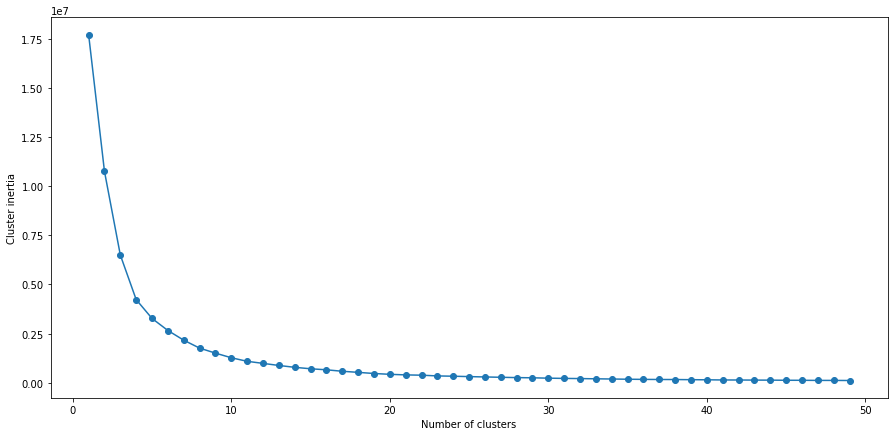

In [7]:
inertia = []
k_min=1
k_max=50
for i in range(k_min, k_max):
    print(i)
    km = KMeans(n_clusters=i,init='k-means++')
    km.fit(data_reduced)
    inertia.append(km.inertia_)
plt.rcParams['figure.figsize'] = [15,7]
plt.plot(range(k_min,k_max), inertia,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia')
plt.show()

## Silhouette scores

For n_clusters = 4 The average silhouette_score is : 0.45071477
For n_clusters = 5 The average silhouette_score is : 0.4539469
For n_clusters = 6 The average silhouette_score is : 0.46608153
For n_clusters = 7 The average silhouette_score is : 0.48073074
For n_clusters = 8 The average silhouette_score is : 0.5064172
For n_clusters = 9 The average silhouette_score is : 0.5157289
For n_clusters = 10 The average silhouette_score is : 0.5304292
For n_clusters = 11 The average silhouette_score is : 0.5571211
For n_clusters = 12 The average silhouette_score is : 0.5572192
For n_clusters = 13 The average silhouette_score is : 0.5636325
For n_clusters = 14 The average silhouette_score is : 0.5770835
For n_clusters = 15 The average silhouette_score is : 0.5824749
For n_clusters = 16 The average silhouette_score is : 0.5567479
For n_clusters = 17 The average silhouette_score is : 0.571059
For n_clusters = 18 The average silhouette_score is : 0.585554
For n_clusters = 19 The average silhouette_sc

C:\Users\strum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 24 The average silhouette_score is : 0.5455146


C:\Users\strum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 25 The average silhouette_score is : 0.55396867


C:\Users\strum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 26 The average silhouette_score is : 0.5218239


C:\Users\strum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 27 The average silhouette_score is : 0.5872994


C:\Users\strum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 28 The average silhouette_score is : 0.52672714


C:\Users\strum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


For n_clusters = 29 The average silhouette_score is : 0.53627026


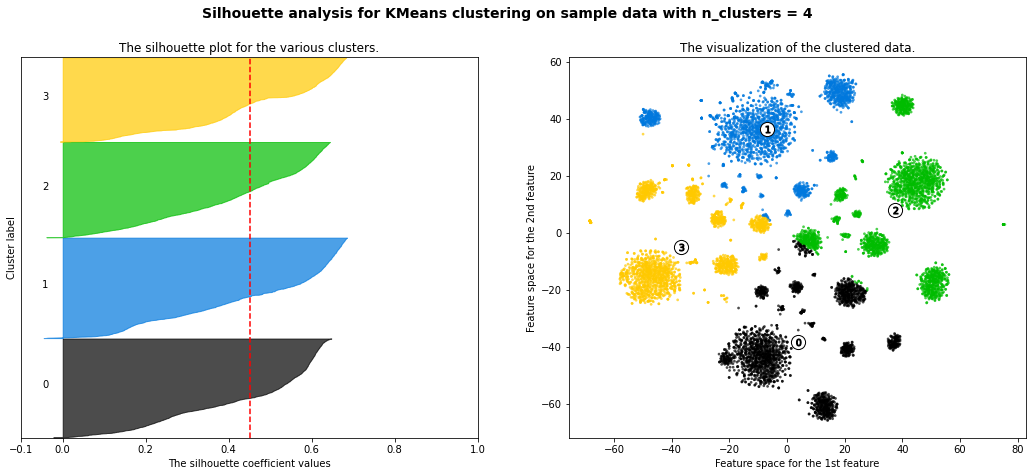

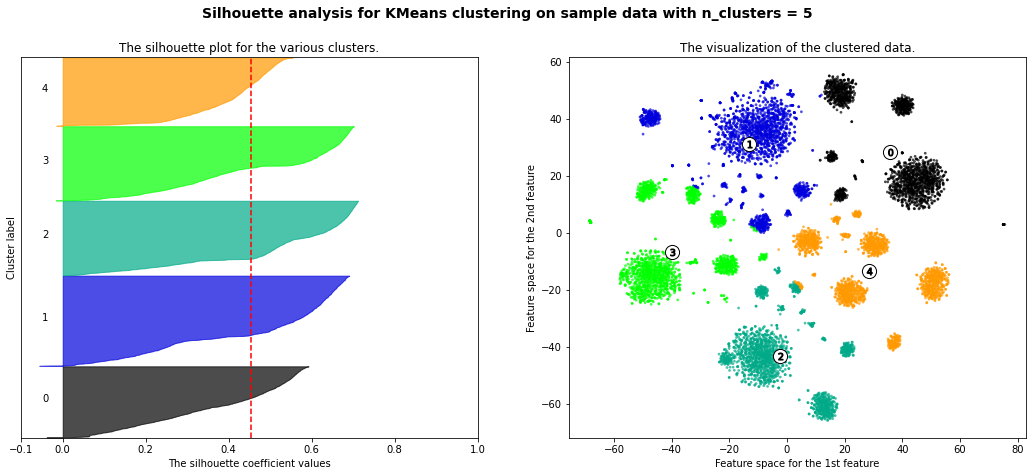

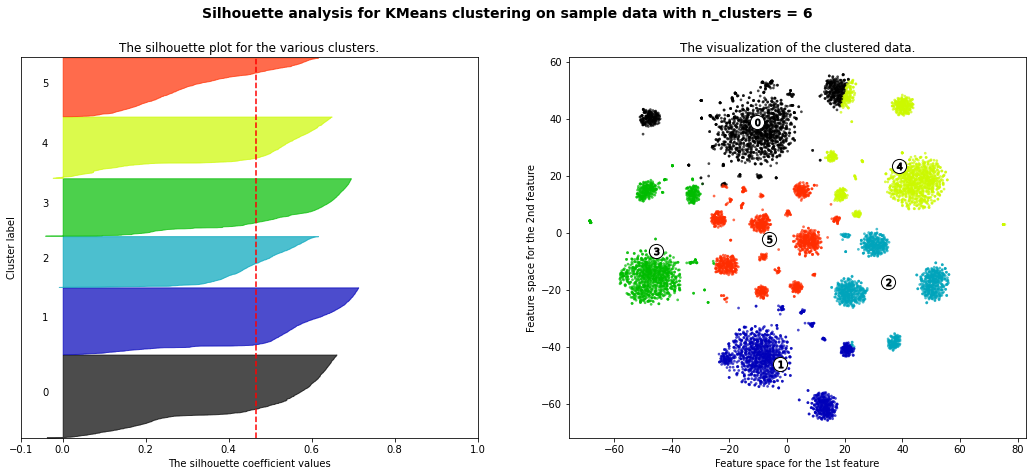

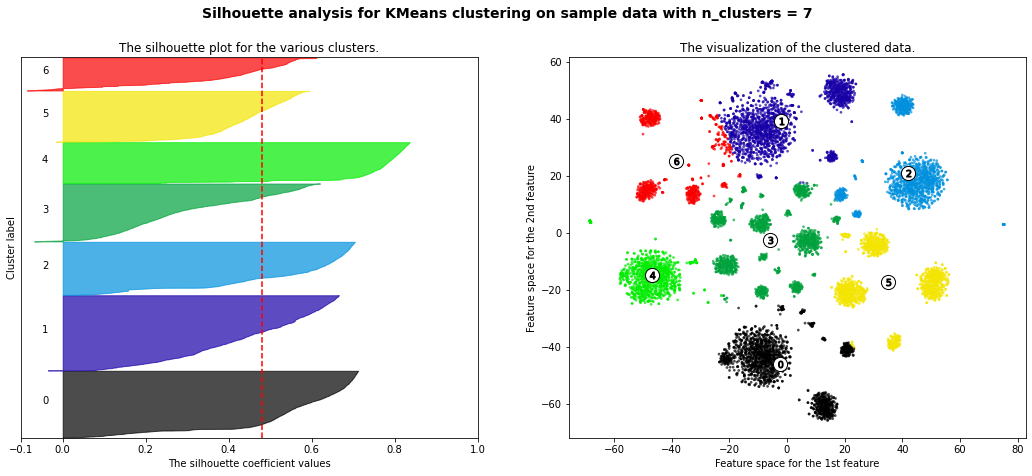

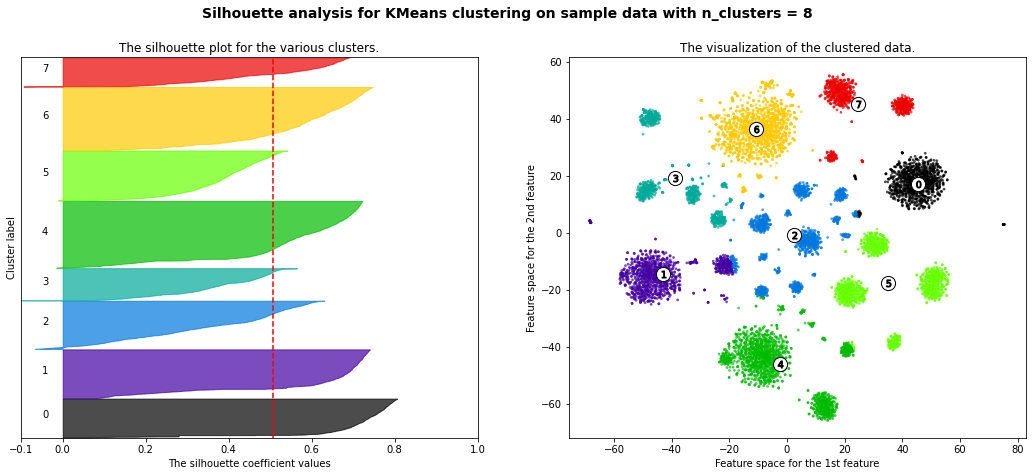

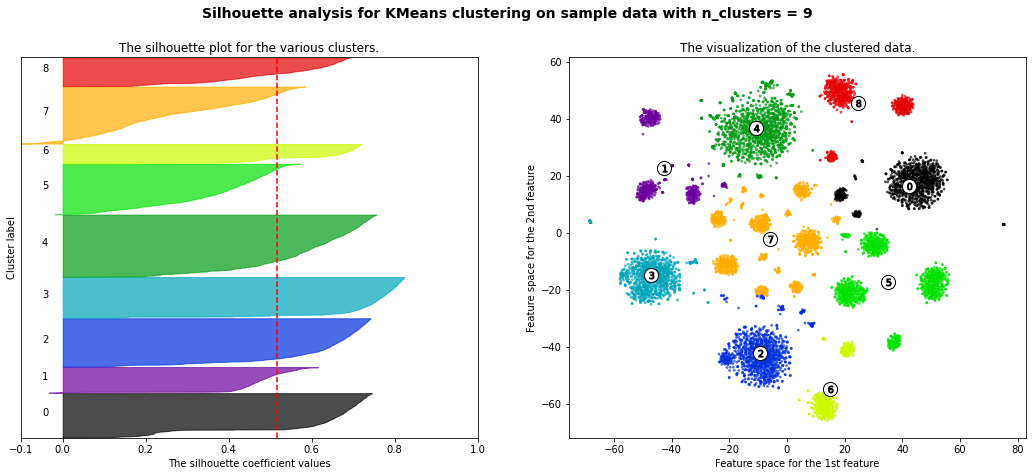

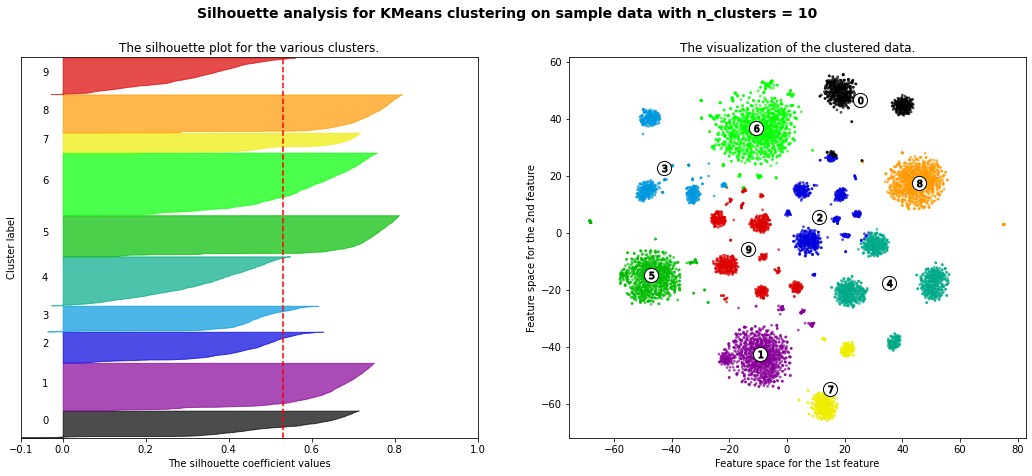

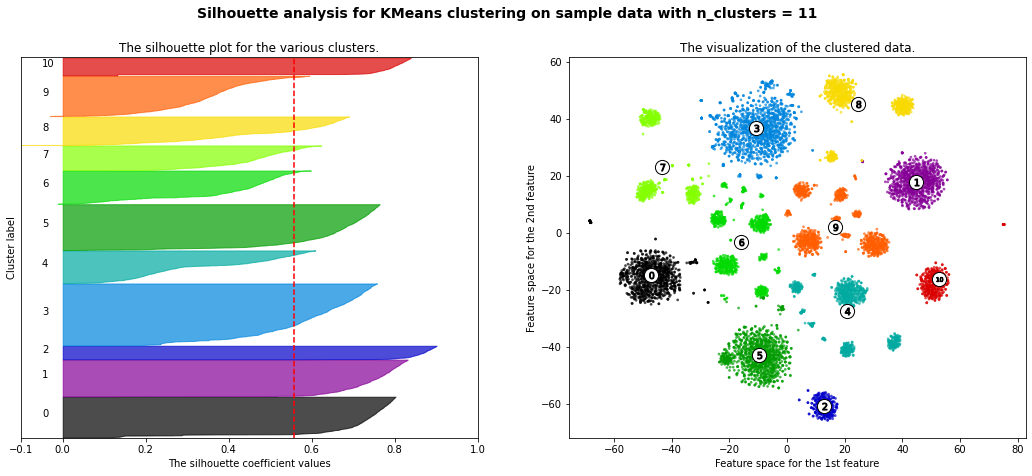

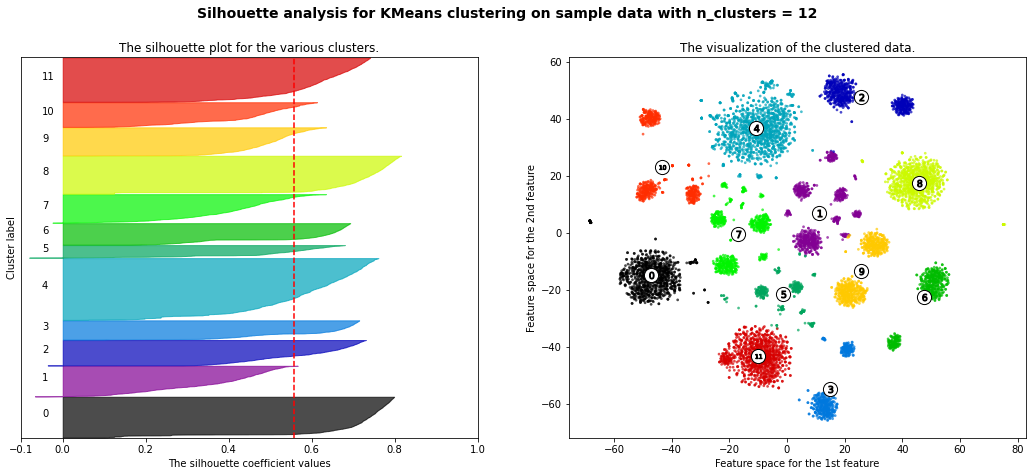

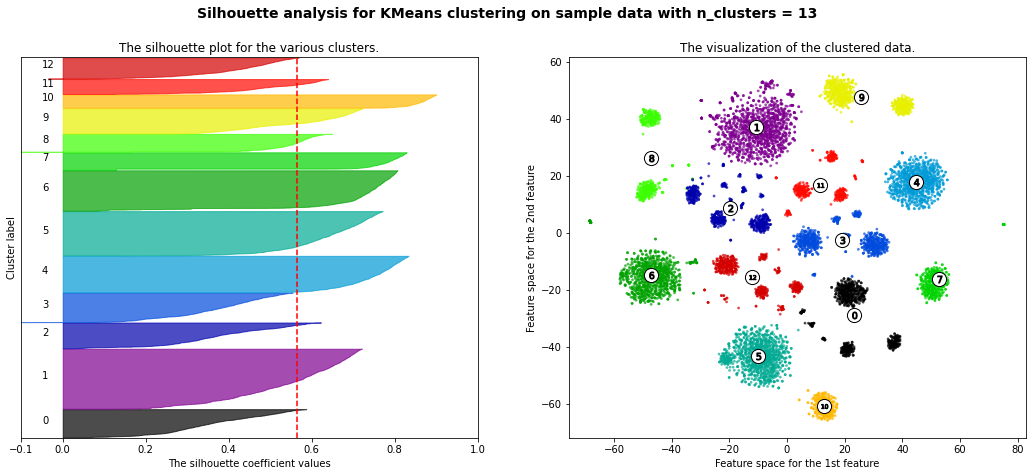

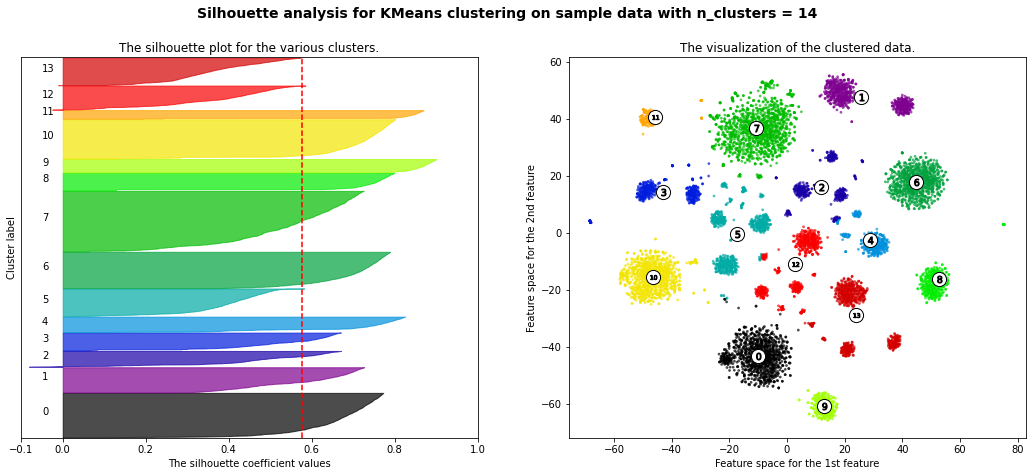

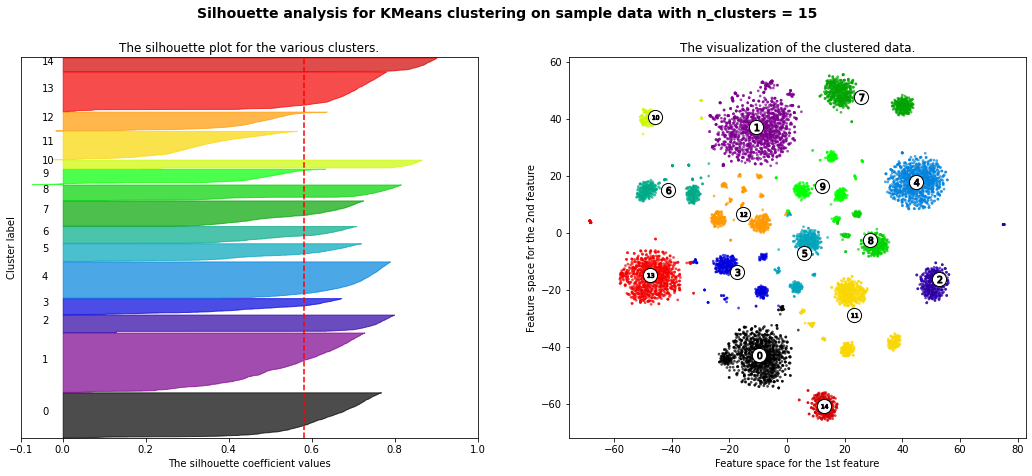

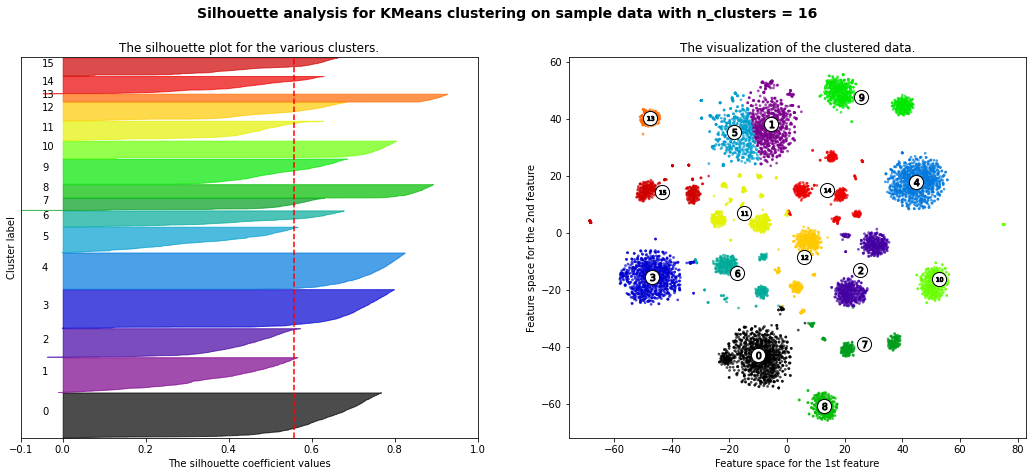

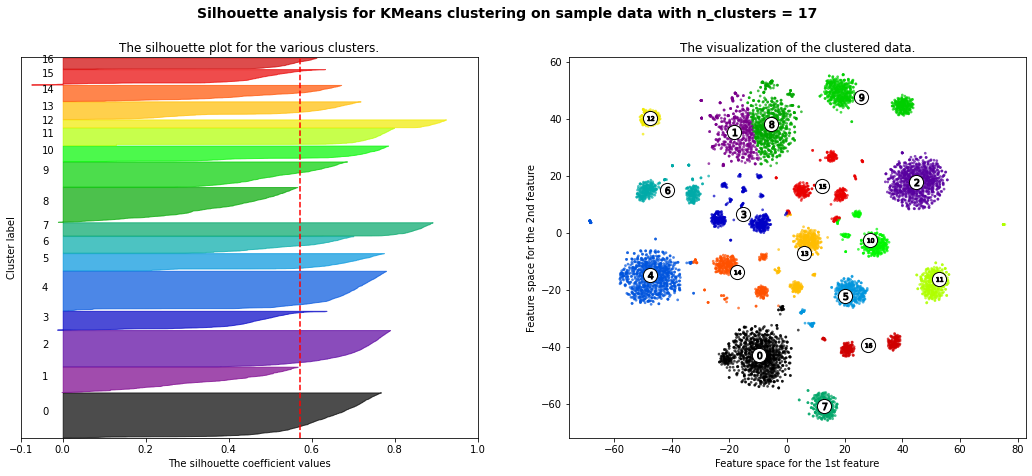

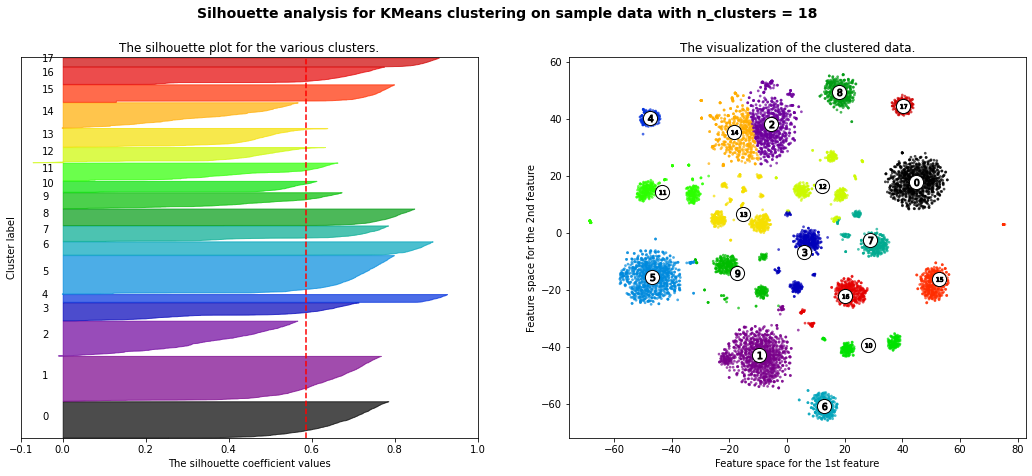

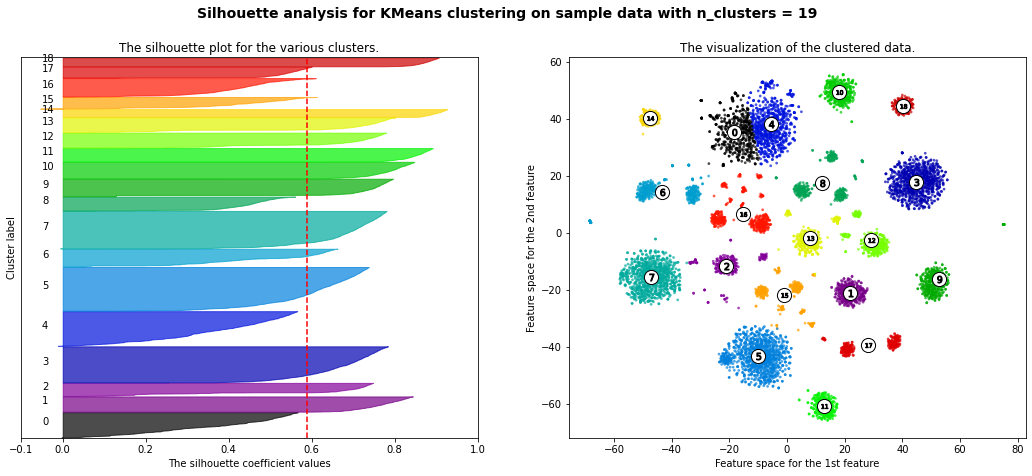

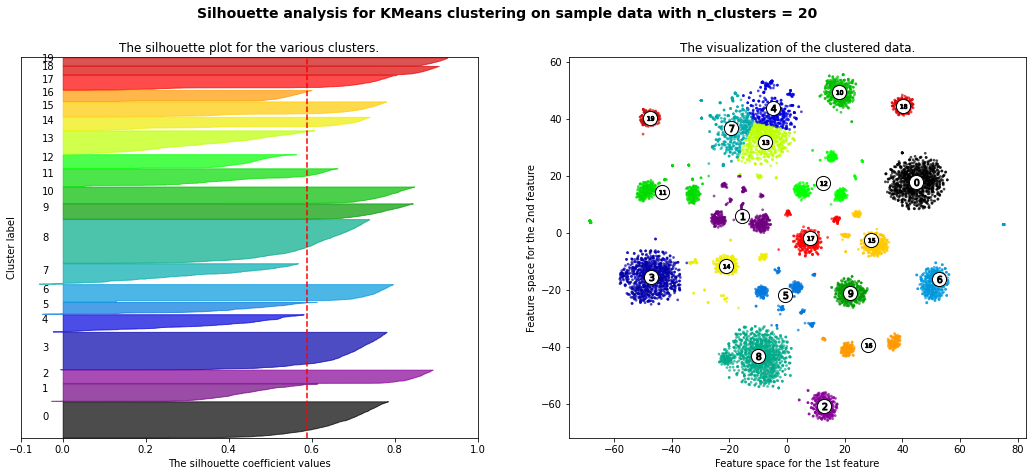

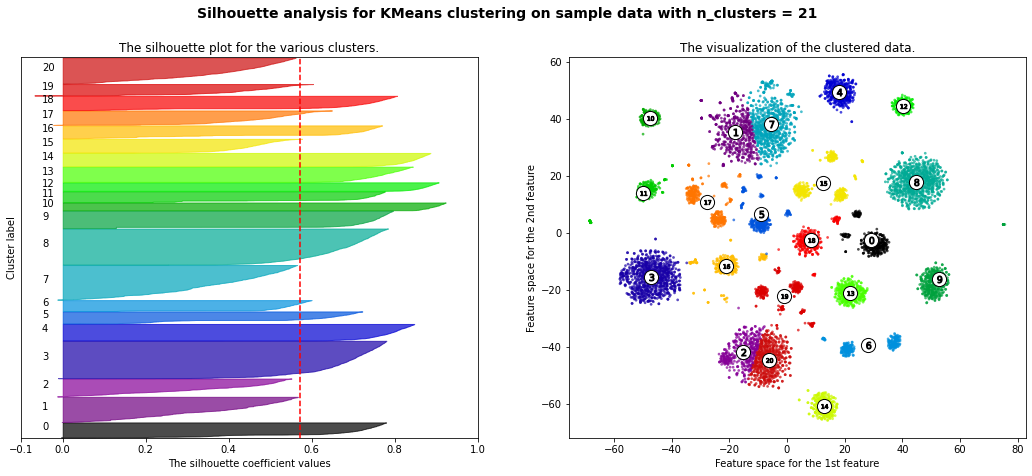

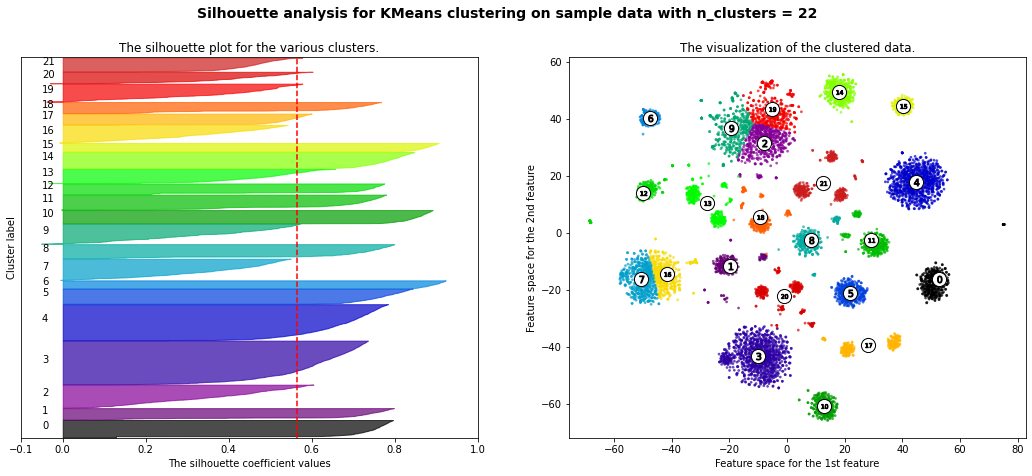

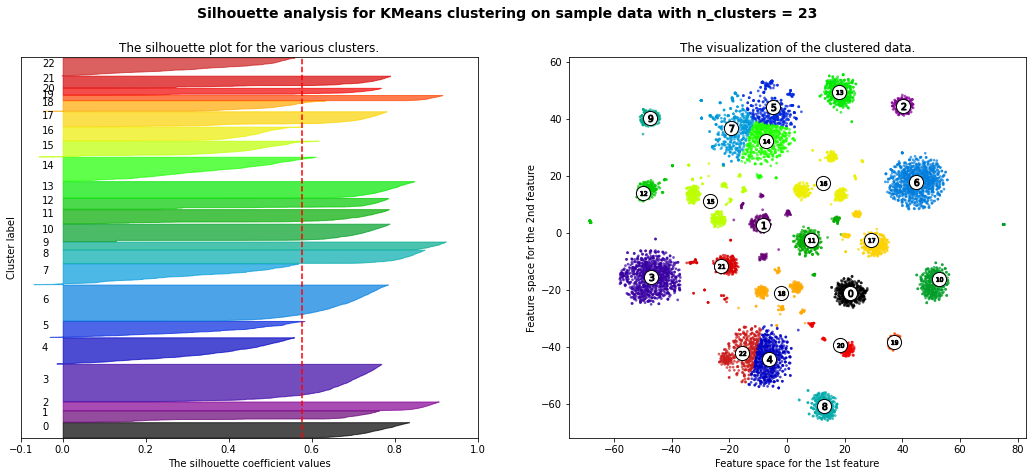

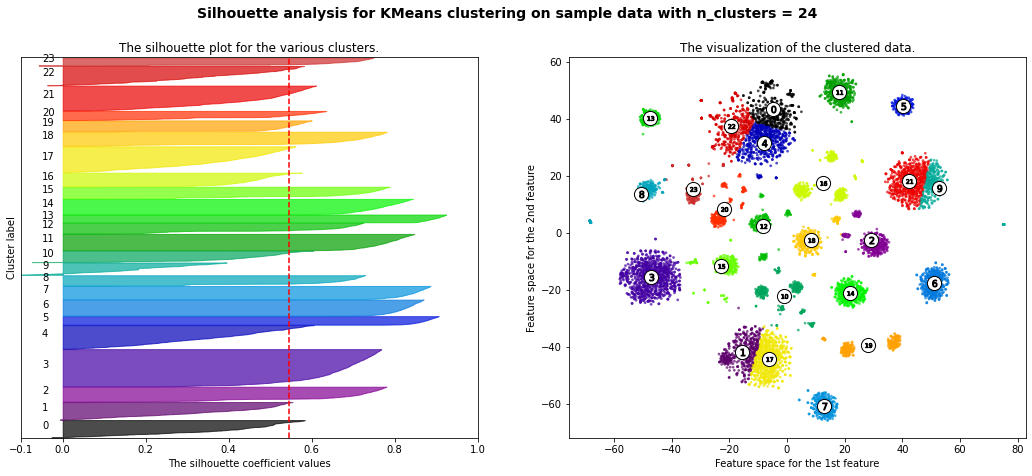

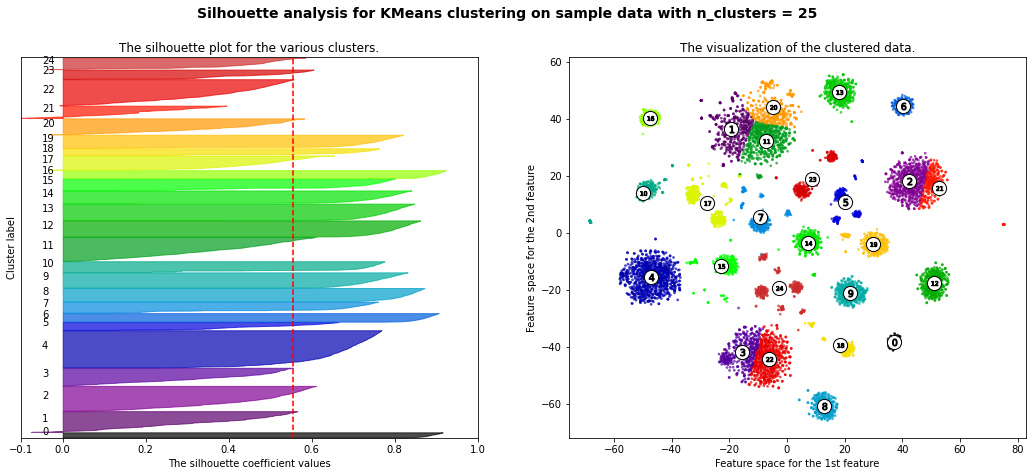

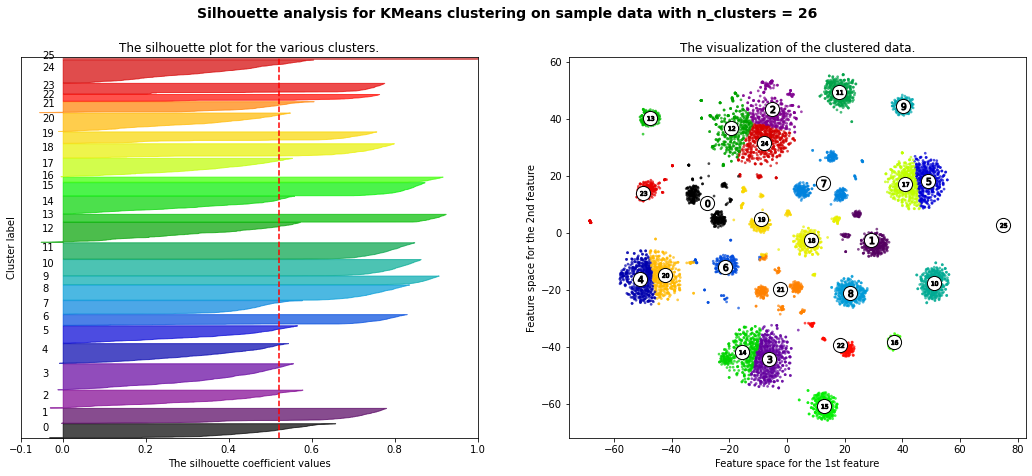

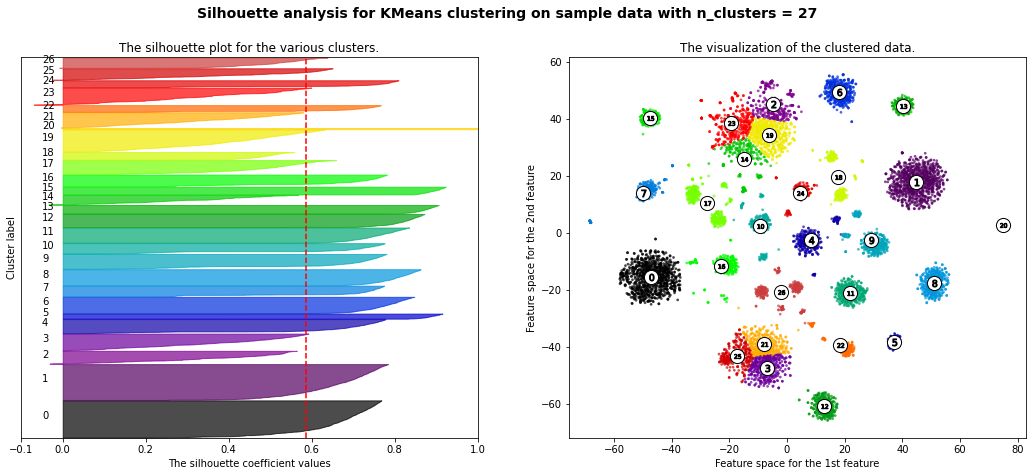

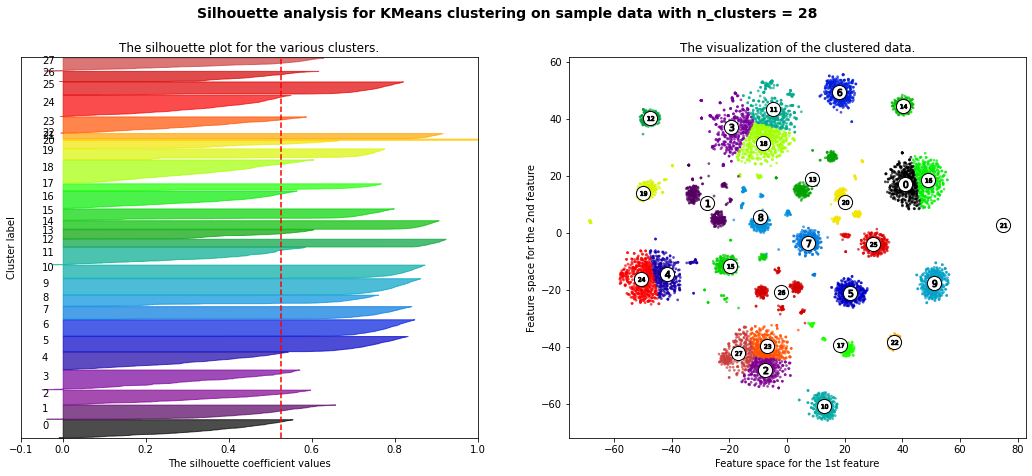

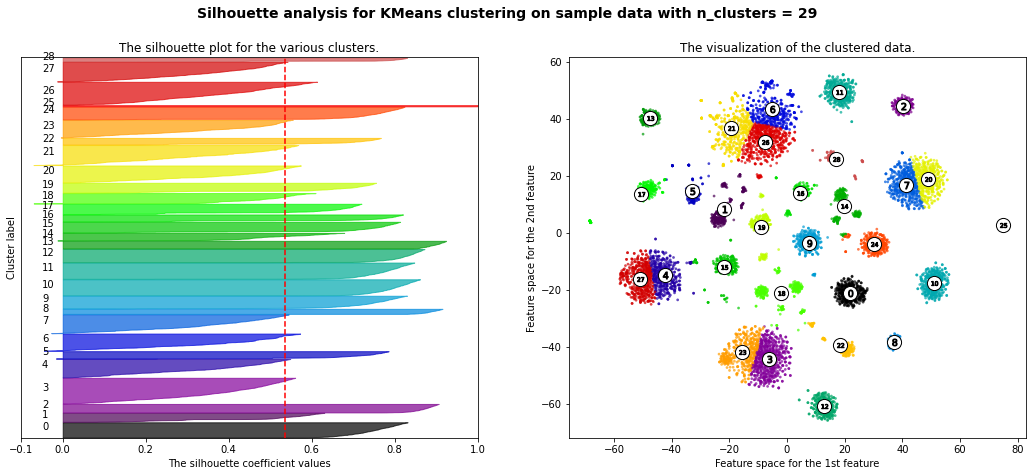

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for n_clusters in range(4,30):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_reduced) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_reduced)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_reduced, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_reduced, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_reduced[:, 0], data_reduced[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Analyzing with narrative

In [8]:
number_clusters = 10
km = KMeans(n_clusters=number_clusters,init='k-means++')
indexes = km.fit_predict(data_reduced)
centroids = km.cluster_centers_

#v_df = pd.DataFrame(vectors)
df_result = pd.concat([df, pd.DataFrame(indexes)], axis = 1)
print(df_result)

                                                Product  \
0             Payday loan, title loan, or personal loan   
1             Payday loan, title loan, or personal loan   
2                                 Vehicle loan or lease   
3     Money transfer, virtual currency, or money ser...   
4             Payday loan, title loan, or personal loan   
...                                                 ...   
9405                        Checking or savings account   
9406                            Bank account or service   
9407                            Bank account or service   
9408                            Bank account or service   
9409                            Bank account or service   

                     Sub-product  \
0               Installment loan   
1               Installment loan   
2                           Loan   
3                Debt settlement   
4                    Payday loan   
...                          ...   
9405            Checking account   
940

Cluster number: 0
transunion and i have submitted several dispute to them as to verifying with the proper court house on a bankruptcy. the reporting agency advised me that they verified through a third party which my information was frozen with to not provide information to anyone. but these credit reporting agencies have failed to do there job and verify with the direct source. i have attached documents that i have received from the credit reporting agency as well as they court house that they have not verified the proper information.

 experian and are reporting incorrectly late payments in 2019 for the partial account number . please see pages 4 and 5 of the attached credit report. i made two consecutive payments in and my regular scheduled monthly payment in which brought this account caught up and current to date. these late payments should not be reflected on my credit report. this incorrect reporting is harming my credit score. please remove these late payments from my credit re

hello cfpb i am had a credit card with the bank of america card ending however i called and spoke with someone not remembering her name unfortunately. she helped me to closed the account with balance and later i received email from boa noticed that i still had a balance 17.00 i ignored the bill because it could be an error because i was told my account is at the time i wanted to pay off the balance. i saw boa s report appeared on my credit agency this is not fair for consumer. i chatted with boa regarding the open balance 17.00 on xx/xx/ her name is asked me to pay i did pay off the 17.00 but i do not agree but accepted to pay. this situation does not sound fair to consumer how boa keeps bearing the open balance even it was balance paid off .below is our chat conversation made on xx/xx/ you as i said i want to pay full mean no bearing amount due in future correct. i am able to set up the payment today for /2019 and the pay off amount will leave the account with a balance once it closes

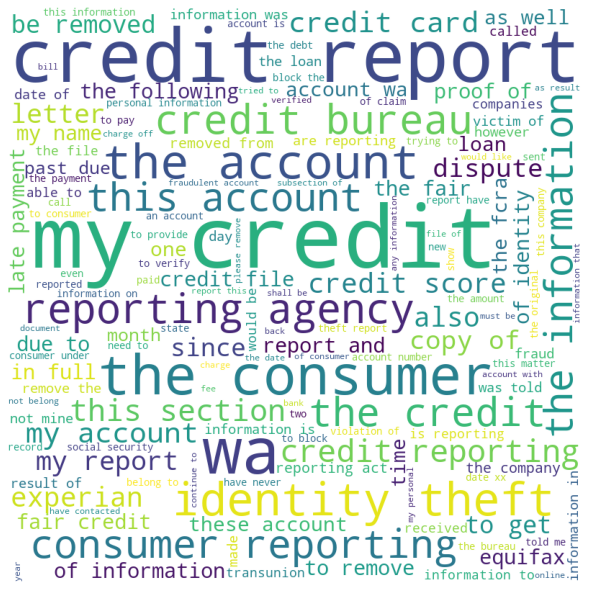

Cluster number: 1
on  i and my girlfriend decided to seek alternatives to her current medical treatment. for the last 4-5 years she has been suffering from and most notably in her along with a . during this time span her body has deteriorated in some capacity and in no small part to the endless supply of pharmaceuticals shes been asked to take by her doctor where as she puts it " is rotting her from the inside out. it was on this day that we chose to break wisconsin laws and seek alternative treatments that could potentially provide her with some relief. we then found - an online website that would distribute ship to our address after being denied numerous times by other websites due to outdated and archaic laws in this " free society. since we can not move because my son is years old and enrolled in school in the city we reside in we decided it was worth the risk to send payment via paypal to the people i was directed to which i will provide detail of in the next section. to make a ve

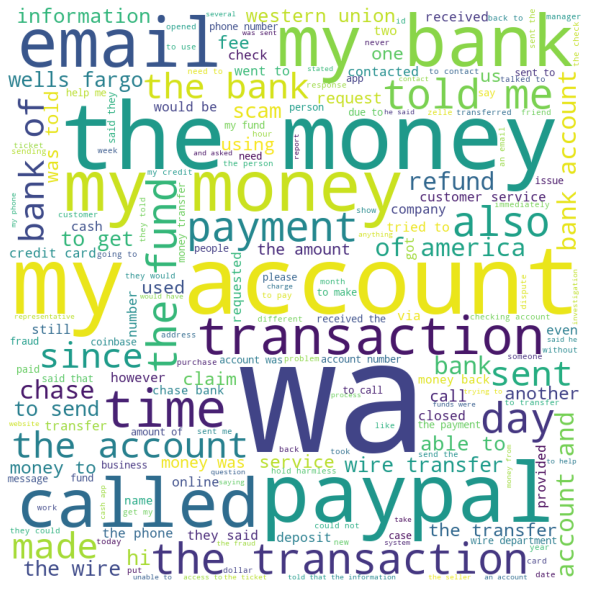

Cluster number: 2
in the year of i randomly received a letter from capital one regarding a capital one 360 checking account. i was immediately scared and thought i was a victim of identity theft. i have never opened a capital one checking account. the is account with my name and address on it seems to have a negative balance of - 490.00 . i called capital one using a phone number listed for them online and not the one on the letter itself. i also assumed this could be a phishing letter or scam letter. but when i called them after some searching they did find an account they feel is mine. this account they found is not a checking account at all. it was a very old and charged of account from ing an old online banking savings account that was opened in assumed charged off and closed by me. i recall the collection process ended smoothly as i was deemed mentally disbaled by social security ssdi and 100 of my income was non collectible by law and i did not have the funds to repay that debt. 

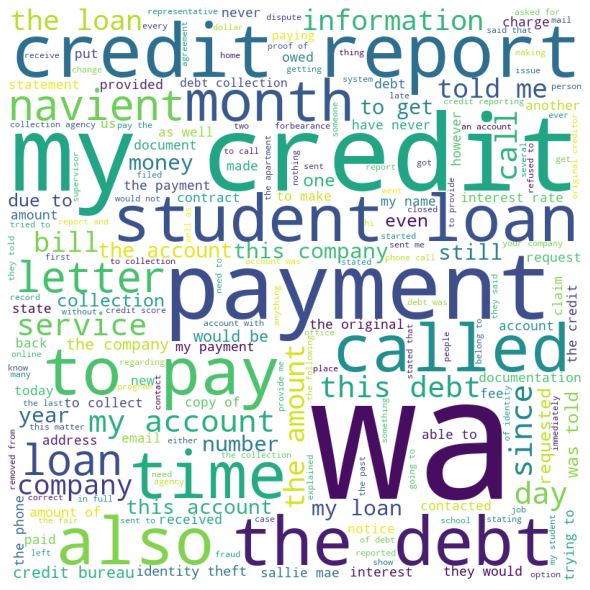

Cluster number: 3
santander consumer usa is the name of the financial institution. i bought a car from in tn where i reside. it was a 2012 . they sold me the car for 14000.00 . i paid 2000.00 dollars down on the vehicle. santander consumer usa loaned me 12000.00 at a 24 interest rate. theyre saying i still owe them almost 7000.00 . ive paid them 300.00 for 46 months. if i was to pay them any moneys after what i believe to be the last two payments of 300.00 it would be outside the fair market value of the car and further violative of both federal and state laws governing lending institutions. there principle place of business is located in texas . . . that their lending having me to pay another 7000.00 should be treated as usury interest.

westlake finiacal showing a balance of owed when car was totaled in paid them off i havent had the car in 4months i need it removed off my credit report

on xx/xx/ i called credit acceptance because i noticed the last bit of my payment didn t come off

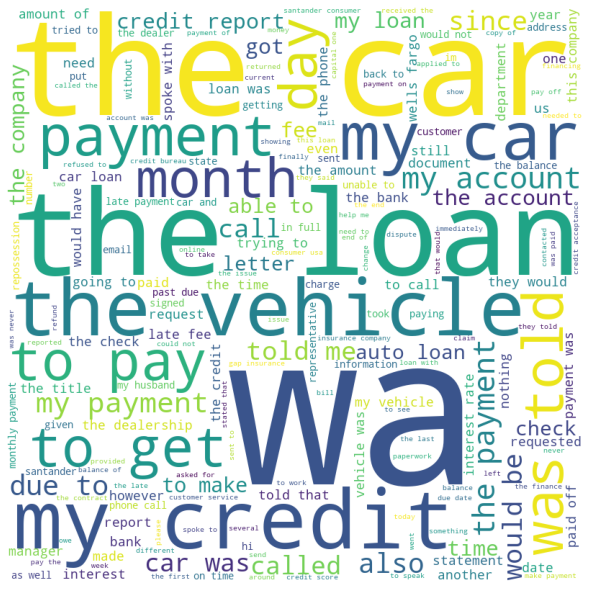

Cluster number: 4
i was shocked when i reviewed my credit report and found late payment on the dates below -30 days late i am not sure how this happened i believe that i had made my payments to you when i received my statements. my only thought is that my monthly statement did not get to me.

i had an issue with an item i purchased on where the item came from a third party seller. item was a camera that did not come with a wall charger and connected to its own wifi that did not work unless my cellphone was within 10 feet of the camera which defeats the whole purpose of having the security camera. contacted the seller for a refund they sent me a return label where i as the buyer had to pay return shipping. item was received by the merchant and the merchant refuses to respond to communication and will not issue refund. i contacted bank of america credit card to dispute the charge i mailed them the documentation necessary and they claim they dont have anything and the only way to give the

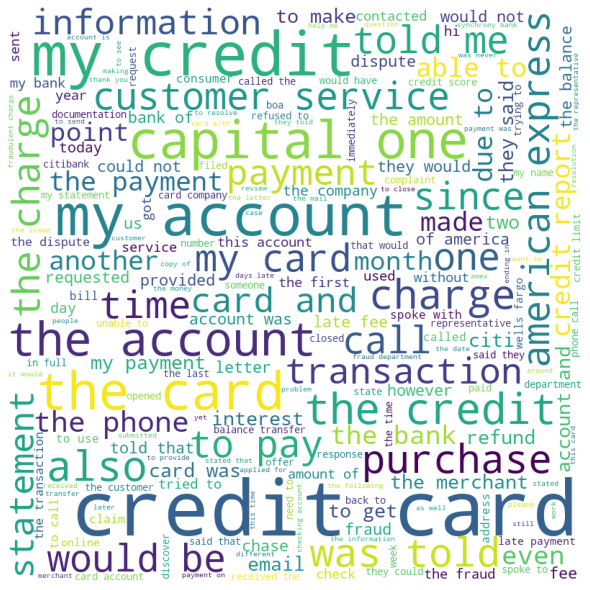

Cluster number: 5
i borrowed money on a payday loan in amount of 450.00 they said rates would be about 14 i am now being charged 699 and they ach money from my account i tried to talk to person on phone and could not get a human. i called pa dept of banking and they could not help and they suggested i contact you i have already paid principle and probably 50 in interest. pennsylvania also said the interest rate 6 in pa they claim the are an so are exempt from federal guidelines posted on there website 

we have a credit on our escrow account in the amount of 3000.00 . our lender mortgage claims to have mailed this to us but refuses to provide any proof and refuses to let me speak with a supervisor. i have spoken with them on xx/xx/ xx/xx/ and xx/xx/. they claim to have mailed 2 checks 990.00 on xx/xx/. not received as of xx/xx/. 2000.00 check in xx/xx/. not received. they claim it was cashed but refuse to provide any proof. i have no record of the deposit.

we had a tornado damage our 

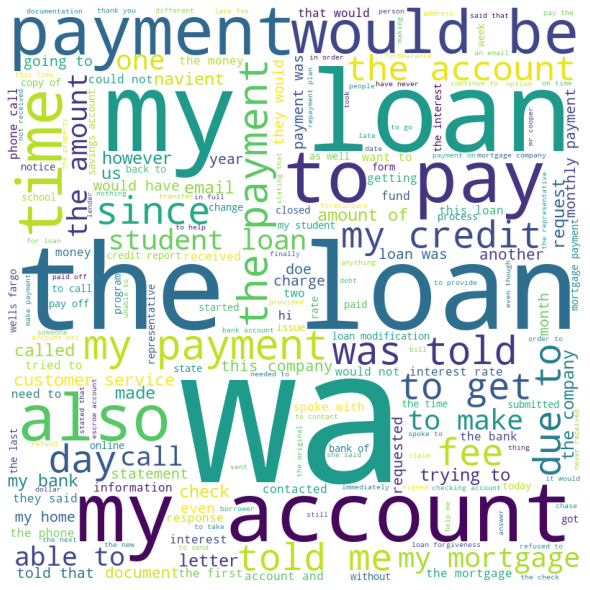

Cluster number: 6
we have online banking with chase. chase bank sent our mortgage payment to the wrong address. this was on . it is now mid xx/xx/ and they will not give us our money back. they are asking us to prove that the mortgage lender never received the money. this is odd because chase showed us the front and back of the check that was sent to the wrong address and was negotiated by an entity that was not our mortgage provider. my credit has been dinged through no fault of my own we had to write a second check to prevent foreclosure discussions and i still dont have my money. i would like my money returned plus interest. i would like them to clear up my credit on this issue and i would like to be compensated for the 4 hours we spent on the phone with chase and our mortgage provider. they will give a provisional credit if we prove that the mortgage company never received it but this is clearly insufficient. in my book when someone makes a mistake with someone elses money and they

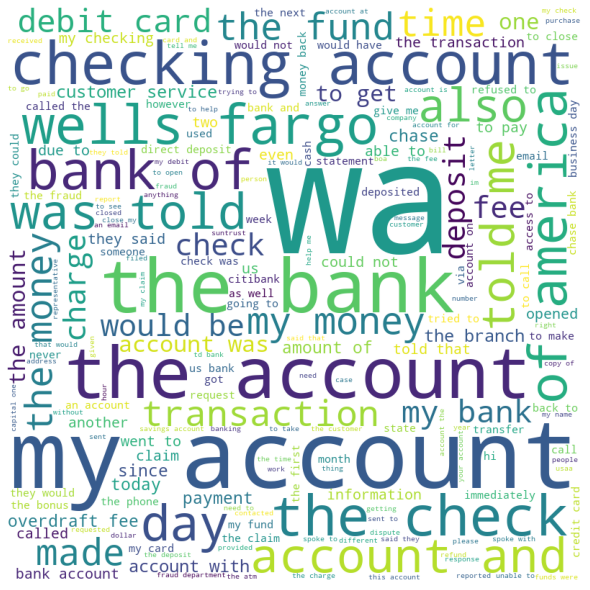

Cluster number: 7
this complaint deals with a variety of transactions all involving one particular vendor. the first troubling transaction date began in late of . all of the transactions were items used for the purposes of remodeling our home. the vendor/merchant had significant issues with fulfilling orders so much so that almost every order we made had to be corrected and/or refunded. thousands of dollars were lost due to these issues. as such i used the paypal dispute resolution form to dispute the problems since the local merchant s store was of no help or assistance to my issues. as paypal processed the disputes they came to believe that i violated the terms of service and placed my account on hold. they would later close my account due to the amount of disputes which i have moved on from. but as the processed disputes they used a selective way to actually process if the outcome of the dispute was in my or the seller s favor. allow me to explain by each transaction that i am dispu

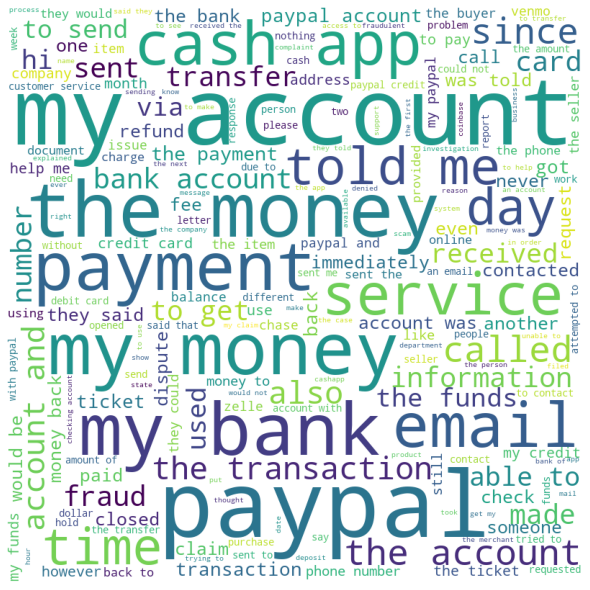

Cluster number: 8
every month when i called lendingclub to make my payment they don t post the payment with the same day i called to make my payment if the payment is within the cut off time. i submitted plenty of complaints and ni one called me or sending a resolution of the complaint. o letter no calls. nothing. recently i called and they advised me that i have a payment that was applied to principal because i paid before the due date. i request the payment to be reversed and apply the payment to the current month but they advised they are not able to do that. also because of the poor customer service asked for a supervisor and they informed there is no supervisors available. this is no the first time this happened.

i got a loan with this atlas credit in texas i was paying on time all the time i was helping my parents out and have been having a hard time since i tried talking with the company the manager starts going off on me and talking down to me and so hung up called the dm even

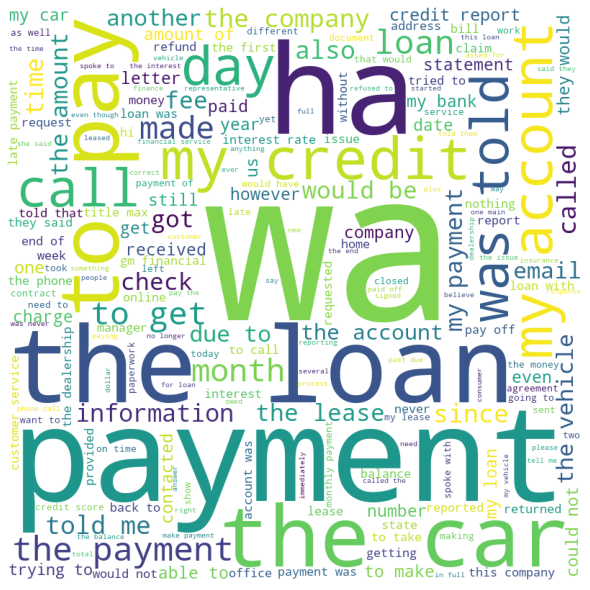

Cluster number: 9
i had received notice of an attempt to collect the debt in the past but i ve been unemployed for 2 years and my spouse had been unemployed for most of the last year so i held on to the information. i reached out to the debt collector on xx/xx/ through their contact portal. i specifically told them that i was currently employed and would like to negotiate a settlement since i was currently solvent through email. i received an immediate verification that they had received my request and would respond back via email as requested to my request. i ve not heard a word and my request was to only receive email communication. since i m willing to negotiate a settlement i figured they would want to work with me quickly but this seems to not be the case. i also require debt verification at this point according to texas debt collection laws which i ve not received. the texas laws can be found on the texas attorney generals website.

i received a notice about change of terms from 

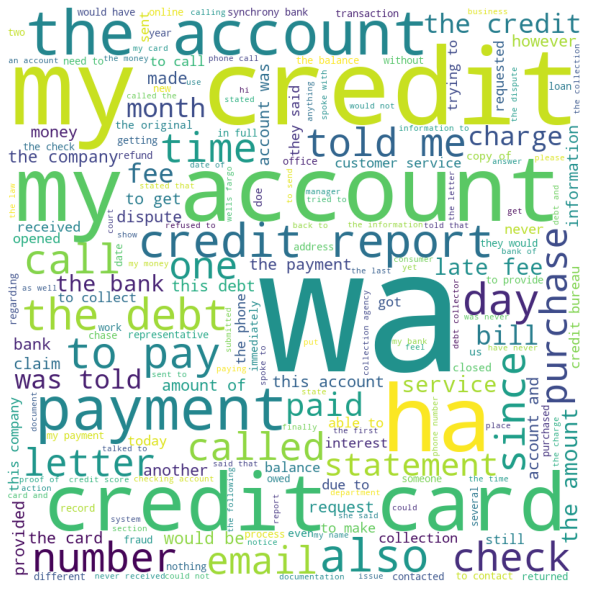

In [9]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import random

#if it's your first time running with these stopwords, run the following line aswell:
#nltk.download('stopwords')

stopwords = set(stopwords.words('english'))
stopwords.add('xx')

for i in range(0,number_clusters):
    all_words = ''
    print('Cluster number: '+str(i))
    amount = 0
    for index, row in df_result.iterrows():
        if row[0] == i:
            all_words += ' ' + row['Consumer complaint narrative']
            rand = random.randint(1,200)
            amount += 1
            if(rand == 1):
                print(row['Consumer complaint narrative'] + '\n')
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(all_words) 
    print('Number of entries: ' + str(amount))
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show() 
